In [1]:
# Aufgabe 1.a

import numpy as np

D = np.loadtxt('data.txt')

print('Anzahl Datenpunkte:', D.shape[0], '\nAnzahl Dimensionen:', D.shape[1])

Anzahl Datenpunkte: 10000 
Anzahl Dimensionen: 6


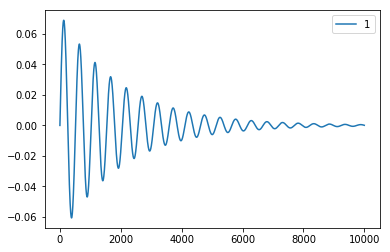

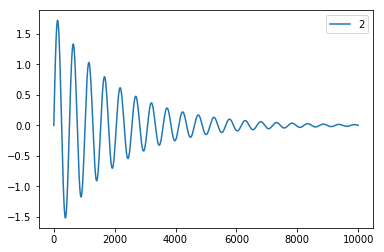

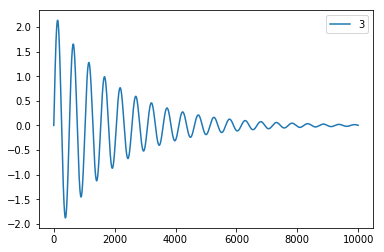

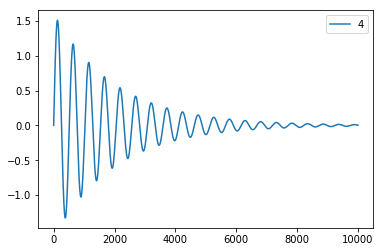

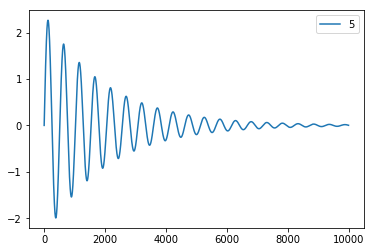

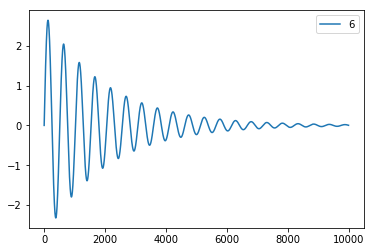

In [3]:
import matplotlib.pyplot as plt

for dim in range(D.shape[1]):
    plt.plot(D[:, dim], label = dim + 1)
    plt.legend()
    plt.show()

In [73]:
# Aufgabe 1.b

for i in range(D.shape[1]):
    D[:, i] -= D[:, i].sum() / len(D)

D_transposed = D.transpose()

In [5]:
# Aufgabe 1.c

K = np.zeros([len(D_transposed), len(D_transposed)])

for i in range(len(K)):
    for j in range(len(K)):
        cov = 0
        for n in range(D_transposed.shape[1]):
            cov += D_transposed[i, n] * D_transposed[j, n]
        K[i, j] = cov / D_transposed.shape[1]
        
print(K)

[[  2.68460397e-04   6.71128411e-03   8.33259988e-03   5.88013213e-03
    8.83208816e-03   1.03044568e-02]
 [  6.71128411e-03   1.67776457e-01   2.08307988e-01   1.46998357e-01
    2.20794775e-01   2.57602752e-01]
 [  8.33259988e-03   2.08307988e-01   2.58631148e-01   1.82510303e-01
    2.74134500e-01   3.19834569e-01]
 [  5.88013213e-03   1.46998357e-01   1.82510303e-01   1.28793499e-01
    1.93450676e-01   2.25700208e-01]
 [  8.83208816e-03   2.20794775e-01   2.74134500e-01   1.93450676e-01
    2.90567182e-01   3.39006690e-01]
 [  1.03044568e-02   2.57602752e-01   3.19834569e-01   2.25700208e-01
    3.39006690e-01   3.95521390e-01]]


In [139]:
# Aufgabe 1.d

def Inv(Inv_input, Inv_guess, Inv_tol):
    Inv_A = np.copy(Inv_input)
    # EW: Eigenwert, EWs: Eigenwerte, EV: Eigenvektor, EVs: Eigenvektoren
    Inv_EWs = np.empty([0])
    Inv_EVs = np.empty([0, len(Inv_input)])
    iter_counts = np.empty([0])
    
    for i in range(len(Inv_input)):
        # Inv_Coeff: Koeffizientenmatrix des LGS der Inversen Iteration
        Inv_Coeff = Inv_A - np.identity(len(Inv_guess)) * Inv_guess[i]
        Inv_EV = np.ones(len(Inv_A))
        Inv_EW = Inv_guess[i]
        
        for iter_count in range(100001):
            # Inverse Iteration:
            Inv_EV1 = np.linalg.solve(Inv_Coeff, Inv_EV / np.linalg.norm(Inv_EV))
            # Rayleigh Quotient:
            Inv_EW1 = np.dot(Inv_EV.transpose(), np.dot(Inv_A, Inv_EV)) / np.dot(Inv_EV.transpose(), Inv_EV)
            
            if iter_count == 100000:
                print('Max iterations reached.')
                break
                
            # bricht ab, wenn Differenz der EW < Inv_tol
            elif abs(Inv_EW - Inv_EW1) < Inv_tol:
                iter_counts = np.append(iter_counts, iter_count)
                Inv_EVs = np.append(Inv_EVs, [Inv_EV1], axis=0)
                Inv_EWs = np.append(Inv_EWs, Inv_EW1)
                break
            
            Inv_EV = Inv_EV1
            Inv_EW = Inv_EW1
            
    return Inv_EWs, Inv_EVs, iter_counts

In [140]:
goodguess = np.array([0, 1, 7e-16, 2e-15, -8e-16, -3e-15])

print(Inv(K, goodguess, 1e-5))

(array([  1.34192435e-18,   1.24155794e+00,   7.28655153e-16,
         2.05595113e-15,  -8.91214670e-16,  -3.13452407e-15]), array([[  7.13073677e+17,   6.00023922e+15,   1.06535222e+16,
          6.04296273e+16,  -1.00590909e+16,  -5.69621786e+16],
       [  6.12346501e-02,   1.52187942e+00,   1.88944596e+00,
          1.33344996e+00,   2.00268434e+00,   2.33648325e+00],
       [ -2.53501978e+15,  -1.17198942e+16,  -6.40021862e+14,
          2.91668245e+16,  -9.02932139e+15,  -6.87846193e+14],
       [ -6.59980625e+14,   2.36564757e+16,  -1.87460087e+15,
          3.46111343e+15,  -1.97088579e+16,   1.04330718e+15],
       [  9.03590293e+14,  -2.85255933e+15,  -2.94567530e+15,
         -1.90831032e+15,  -3.12337537e+15,   7.98236500e+15],
       [  2.16599222e+13,  -2.16360656e+15,   6.89886479e+15,
         -1.83183781e+15,  -3.57899584e+15,  -5.71850935e+13]]), array([ 2.,  5.,  2.,  2.,  2.,  2.]))


In [125]:
Eigenwerte = abs(Inv(K, goodguess, 1e-10)[0])

print(Eigenwerte)

[  1.34192435e-18   1.24155814e+00   7.28655153e-16   2.05595113e-15
   8.91214670e-16   3.13452407e-15]


In [172]:
Eigenvektoren = Inv(K, goodguess, 1e-10)[1]

# Ich kombiniere EW und EV in einem array
Eigenvektoren = np.append(Eigenvektoren, Eigenwerte)
Eigenvektoren.shape = (7,6)
Eigenvektoren = Eigenvektoren.transpose()
# Das hat komischer Weise nicht funktioniert:
# Eigenvektoren = np.append(Eigenvektoren, Eigenwerte, axis=1)

# und sortiere diesen nach den EW
for i in range(len(Eigenvektoren)):
    Eigenvektoren[[i, np.argmax(Eigenvektoren[i:, -1]) + i]] = Eigenvektoren[[np.argmax(Eigenvektoren[i:, -1]) + i, i]]

Eigenvektoren = np.delete(Eigenvektoren, -1, 1)

D_PCA_Power = np.dot(Eigenvektoren.transpose(), D_transposed)